https://alan-turing-institute.github.io/MLJ.jl/dev/getting_started/#Getting-Started

Required Packages <br>
* DecisionTree <br>
* MLJ <br>
* MLJDecisionTreeInterface

In [1]:
using MLJ
iris = load_iris();

In [2]:
selectrows(iris, 1:3)  |> pretty

┌──────────────┬─────────────┬──────────────┬─────────────┬──────────────────────────────────┐
│ sepal_length │ sepal_width │ petal_length │ petal_width │ target                           │
│ Float64      │ Float64     │ Float64      │ Float64     │ CategoricalValue{String, UInt32} │
│ Continuous   │ Continuous  │ Continuous   │ Continuous  │ Multiclass{3}                    │
├──────────────┼─────────────┼──────────────┼─────────────┼──────────────────────────────────┤
│ 5.1          │ 3.5         │ 1.4          │ 0.2         │ setosa                           │
│ 4.9          │ 3.0         │ 1.4          │ 0.2         │ setosa                           │
│ 4.7          │ 3.2         │ 1.3          │ 0.2         │ setosa                           │
└──────────────┴─────────────┴──────────────┴─────────────┴──────────────────────────────────┘


In [3]:
schema(iris)

┌──────────────┬───────────────┬──────────────────────────────────┐
│ names        │ scitypes      │ types                            │
├──────────────┼───────────────┼──────────────────────────────────┤
│ sepal_length │ Continuous    │ Float64                          │
│ sepal_width  │ Continuous    │ Float64                          │
│ petal_length │ Continuous    │ Float64                          │
│ petal_width  │ Continuous    │ Float64                          │
│ target       │ Multiclass{3} │ CategoricalValue{String, UInt32} │
└──────────────┴───────────────┴──────────────────────────────────┘


In [4]:
import DataFrames
iris = DataFrames.DataFrame(iris);

┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1342


In [5]:
y, X = unpack(iris, ==(:target); rng=123);
first(X, 3) |> pretty

┌──────────────┬─────────────┬──────────────┬─────────────┐
│ sepal_length │ sepal_width │ petal_length │ petal_width │
│ Float64      │ Float64     │ Float64      │ Float64     │
│ Continuous   │ Continuous  │ Continuous   │ Continuous  │
├──────────────┼─────────────┼──────────────┼─────────────┤
│ 6.7          │ 3.3         │ 5.7          │ 2.1         │
│ 5.7          │ 2.8         │ 4.1          │ 1.3         │
│ 7.2          │ 3.0         │ 5.8          │ 1.6         │
└──────────────┴─────────────┴──────────────┴─────────────┘


In [6]:
models(matching(X,y))

47-element Vector{NamedTuple{(:name, :package_name, :is_supervised, :abstract_type, :deep_properties, :docstring, :fit_data_scitype, :human_name, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :inverse_transform_scitype, :is_pure_julia, :is_wrapper, :iteration_parameter, :load_path, :package_license, :package_url, :package_uuid, :predict_scitype, :prediction_type, :supports_class_weights, :supports_online, :supports_training_losses, :supports_weights, :transform_scitype, :input_scitype, :target_scitype, :output_scitype), T} where T<:Tuple}:
 (name = AdaBoostClassifier, package_name = ScikitLearn, ... )
 (name = AdaBoostStumpClassifier, package_name = DecisionTree, ... )
 (name = BaggingClassifier, package_name = ScikitLearn, ... )
 (name = BayesianLDA, package_name = MultivariateStats, ... )
 (name = BayesianLDA, package_name = ScikitLearn, ... )
 (name = BayesianQDA, package_name = ScikitLearn, ... )
 (name = BayesianSubspaceLDA, package_name = 

In [8]:
using MLJDecisionTreeInterface
Tree = @load DecisionTreeClassifier pkg=DecisionTree

import MLJDecisionTreeInterface ✔


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\DSEP0001\.julia\packages\MLJModels\lDzCR\src\loading.jl:168


DecisionTreeClassifier

In [9]:
tree = Tree()

DecisionTreeClassifier(
  max_depth = -1, 
  min_samples_leaf = 1, 
  min_samples_split = 2, 
  min_purity_increase = 0.0, 
  n_subfeatures = 0, 
  post_prune = false, 
  merge_purity_threshold = 1.0, 
  display_depth = 5, 
  rng = Random._GLOBAL_RNG())

In [10]:
evaluate(tree, X, y,
                resampling=CV(shuffle=true),
                        measures=[log_loss, accuracy],
                        verbosity=0)

PerformanceEvaluation object with these fields:
  measure, operation, measurement, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_rows
Extract:
┌────────────────────────────────┬──────────────┬─────────────┬─────────┬───────
│ measure                        │ operation    │ measurement │ 1.96*SE │ per_ ⋯
├────────────────────────────────┼──────────────┼─────────────┼─────────┼───────
│ LogLoss(                       │ predict      │ 1.68        │ 0.951   │ [1.4 ⋯
│   tol = 2.220446049250313e-16) │              │             │         │      ⋯
│ Accuracy()                     │ predict_mode │ 0.953       │ 0.0264  │ [0.9 ⋯
└────────────────────────────────┴──────────────┴─────────────┴─────────┴───────
                                                                1 column omitted


In [11]:
typeof(y)

CategoricalArrays.CategoricalVector{String, UInt32, String, CategoricalArrays.CategoricalValue{String, UInt32}, Union{}} (alias for CategoricalArrays.CategoricalArray{String, 1, UInt32, String, CategoricalArrays.CategoricalValue{String, UInt32}, Union{}})

In [12]:
target_scitype(tree)

AbstractVector{var"#s39"} where var"#s39"<:Finite (alias for AbstractArray{var"#s39", 1} where var"#s39"<:Finite)

In [13]:
subtypes(Finite)

2-element Vector{Any}:
 Multiclass
 OrderedFactor

In [14]:
mach = machine(tree, X, y)

Machine trained 0 times; caches data
  model: DecisionTreeClassifier(max_depth = -1, …)
  args: 
    1:	Source @768 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @769 ⏎ `AbstractVector{Multiclass{3}}`


In [15]:
train, test = partition(eachindex(y), 0.7); # 70:30 split

In [16]:
fit!(mach, rows=train);

┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\DSEP0001\.julia\packages\MLJBase\b4UY0\src\machines.jl:490


In [17]:
yhat = predict(mach, X[test,:]);
yhat[3:5]

3-element CategoricalDistributions.UnivariateFiniteVector{Multiclass{3}, String, UInt32, Float64}:
 UnivariateFinite{Multiclass{3}}(setosa=>1.0, versicolor=>0.0, virginica=>0.0)
 UnivariateFinite{Multiclass{3}}(setosa=>0.0, versicolor=>0.0, virginica=>1.0)
 UnivariateFinite{Multiclass{3}}(setosa=>0.0, versicolor=>0.0, virginica=>1.0)

In [18]:
log_loss(yhat, y[test]) |> mean

2.4029102259411435

# Another example

In [20]:
import DataFrames.DataFrame
X = DataFrame(
                 name       = ["Siri", "Robo", "Alexa", "Cortana"],
                 gender     = ["male", "male", "Female", "female"],
                 likes_soup = [true, false, false, true],
                 height     = [152, missing, 148, 163],
                 rating     = [2, 5, 2, 1],
                 outcome    = ["rejected", "accepted", "accepted", "rejected"])
schema(X)

┌────────────┬───────────────────────┬───────────────────────┐
│ names      │ scitypes              │ types                 │
├────────────┼───────────────────────┼───────────────────────┤
│ name       │ Textual               │ String                │
│ gender     │ Textual               │ String                │
│ likes_soup │ Count                 │ Bool                  │
│ height     │ Union{Missing, Count} │ Union{Missing, Int64} │
│ rating     │ Count                 │ Int64                 │
│ outcome    │ Textual               │ String                │
└────────────┴───────────────────────┴───────────────────────┘


In [21]:
X.outcome = coerce(X.outcome, OrderedFactor)

4-element CategoricalArrays.CategoricalArray{String,1,UInt32}:
 "rejected"
 "accepted"
 "accepted"
 "rejected"

In [22]:
levels(X.outcome)

2-element Vector{String}:
 "accepted"
 "rejected"

In [23]:
# reorder the catergories
levels!(X.outcome, ["rejected", "accepted"])
levels(X.outcome)

2-element Vector{String}:
 "rejected"
 "accepted"

In [24]:
Xnew = coerce(X, :gender     => Multiclass,
                 :likes_soup => OrderedFactor,
                 :height     => Continuous,
                 :rating     => OrderedFactor)
schema(Xnew)

┌ Info: Trying to coerce from `Union{Missing, Int64}` to `Continuous`.
│ Coerced to `Union{Missing,Continuous}` instead.
└ @ ScientificTypes C:\Users\DSEP0001\.julia\packages\ScientificTypes\3irls\src\convention\coerce.jl:174


┌────────────┬────────────────────────────┬──────────────────────────────────┐
│ names      │ scitypes                   │ types                            │
├────────────┼────────────────────────────┼──────────────────────────────────┤
│ name       │ Textual                    │ String                           │
│ gender     │ Multiclass{3}              │ CategoricalValue{String, UInt32} │
│ likes_soup │ OrderedFactor{2}           │ CategoricalValue{Bool, UInt32}   │
│ height     │ Union{Missing, Continuous} │ Union{Missing, Float64}          │
│ rating     │ OrderedFactor{3}           │ CategoricalValue{Int64, UInt32}  │
│ outcome    │ OrderedFactor{2}           │ CategoricalValue{String, UInt32} │
└────────────┴────────────────────────────┴──────────────────────────────────┘


In [25]:
v = Xnew.rating

4-element CategoricalArrays.CategoricalArray{Int64,1,UInt32}:
 2
 5
 2
 1

In [26]:
levels(v)

3-element Vector{Int64}:
 1
 2
 5

In [27]:
levels(v[1:2])

3-element Vector{Int64}:
 1
 2
 5

# Generating Synthetic Data 
https://alan-turing-institute.github.io/MLJ.jl/dev/generating_synthetic_data/

## Gaussian Blobs

In [28]:
using MLJ, DataFrames
X, y = make_blobs(100, 3; centers=2, cluster_std=[1.0, 3.0])
dfBlobs = DataFrame(X)
dfBlobs.y = y
first(dfBlobs, 3)

,x1,x2,x3,y
,Float64,Float64,Float64,Cat…
1,-9.21172,-1.52741,-2.51854,1
2,-1.63283,2.56189,8.38329,2
3,-10.1215,-0.892975,-5.51907,1


┌ Info: Precompiling VegaLite [112f6efa-9a02-5b7d-90c0-432ed331239a]
└ @ Base loading.jl:1342


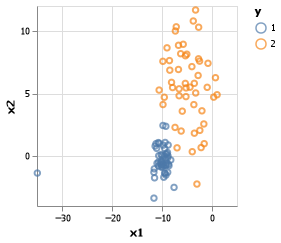

In [30]:
using VegaLite
dfBlobs |> @vlplot(:point, x=:x1, y=:x2, color = :"y:n")

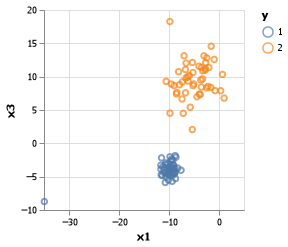

In [31]:
dfBlobs |> @vlplot(:point, x=:x1, y=:x3, color = :"y:n") 

## Concentric circles

In [32]:
using MLJ, DataFrames
X, y = make_circles(100; noise=0.05, factor=0.3)
dfCircles = DataFrame(X)
dfCircles.y = y
first(dfCircles, 3)

,x1,x2,y
,Float64,Float64,Cat…
1,0.102655,1.03491,1
2,0.0913161,-0.213939,0
3,0.248588,-0.238034,0


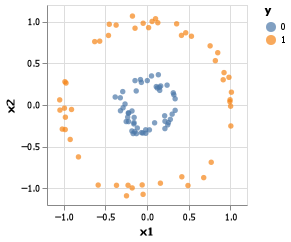

In [33]:
using VegaLite
dfCircles |> @vlplot(:circle, x=:x1, y=:x2, color = :"y:n") 

## Interleaved half circles

In [34]:
using MLJ, DataFrames
X, y = make_moons(100; noise=0.05)
dfHalfCircles = DataFrame(X)
dfHalfCircles.y = y
first(dfHalfCircles, 3)

,x1,x2,y
,Float64,Float64,Cat…
1,1.51043,-0.593545,1
2,1.0766,0.287344,0
3,-0.670029,0.684497,0


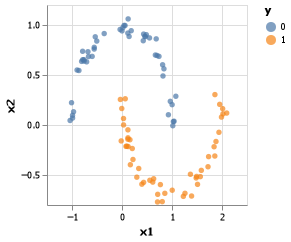

In [35]:
using VegaLite
dfHalfCircles |> @vlplot(:circle, x=:x1, y=:x2, color = :"y:n") 

## Regression data generated from noisy linear models

In [36]:
using MLJ, DataFrames
X, y = make_regression(100, 5; noise=0.5, sparse=0.2, outliers=0.1)
dfRegression = DataFrame(X)
dfRegression.y = y
first(dfRegression, 3)

,x1,x2,x3,x4,x5,y
,Float64,Float64,Float64,Float64,Float64,Float64
1,0.170795,0.589843,-1.38378,-1.63984,0.397865,-26.7806
2,-0.979041,-2.1186,0.900343,-0.289349,1.08183,-1.4616
3,-0.659078,1.01347,0.420311,1.41233,0.160906,0.936487
